In [1]:
import blinpy as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from helpers import *
%matplotlib inline

In [2]:
# generate data
xobs = -np.pi + 2*np.pi*np.random.random(50)
yobs = -np.sin(xobs)**3 + np.cos(xobs)**3 + 0.1*np.random.randn(len(xobs))

In [3]:
# define the fitting grid
xfittest = np.linspace(-np.pi,np.pi,50)
ytrue = -np.sin(xfittest)**3 + np.cos(xfittest)**3
n = len(xfittest)

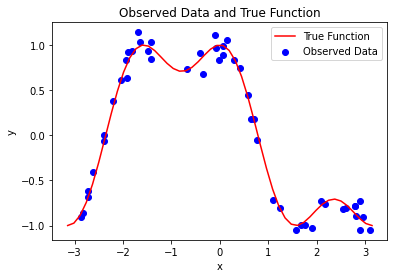

In [4]:
plt.scatter(xobs, yobs, label='Observed Data', color='blue')
plt.plot(xfittest, ytrue, label='True Function', color='red')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Observed Data and True Function')
plt.savefig("toy_samples_figures/original.pdf", format="pdf", bbox_inches="tight")
plt.show()

Best parameters: corrlen=0.7333333333333333, sigma=0.1, energy=1.1555555555555557
        Model  Mean Squared Error  Root Mean Squared Error  \
0  exp square            0.001097                 0.033124   
1    rat quad            0.001373                 0.037055   
2     orn uhl            0.006848                 0.082752   

   Mean Absolute Error  R2 Score  
0             0.027952  0.998264  
1             0.031689  0.997828  
2             0.053565  0.989166  


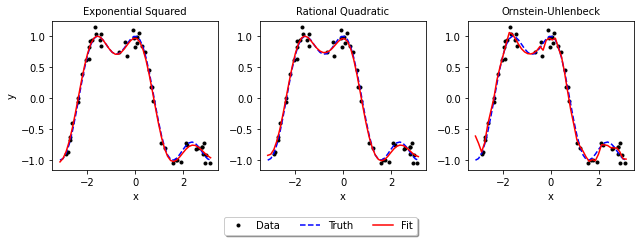

In [5]:
perf_df, fig = fit_gp_gammy(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig.savefig("toy_samples_figures/figure1.pdf", format="pdf", bbox_inches="tight")
print(perf_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.001097                 0.033124   
1                       rat quad            0.001373                 0.037055   
2                        orn uhl            0.006848                 0.082752   
3                         Smooth            0.009331                 0.096595   
4              Smooth + Periodic            0.004199                 0.064801   
5  Smooth + Periodic + Symmetric            0.003581                 0.059843   

   Mean Absolute Error  R2 Score  
0             0.027952  0.998264  
1             0.031689  0.997828  
2             0.053565  0.989166  
3             0.064251  0.985239  
4             0.053432  0.993357  
5             0.050325  0.994334  


<Figure size 648x216 with 0 Axes>

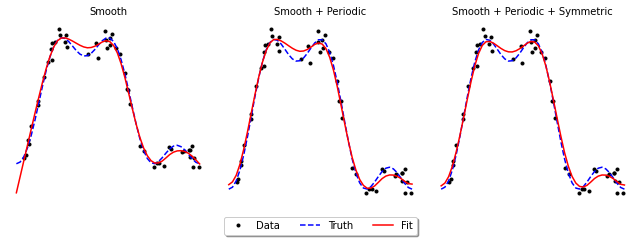

In [6]:
perf_lm, fig = fit_difference_priors(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig.savefig("toy_samples_figures/figure2.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([perf_df, perf_lm], ignore_index=True)
print(combined_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.001097                 0.033124   
1                       rat quad            0.001373                 0.037055   
2                        orn uhl            0.006848                 0.082752   
3                         Smooth            0.009331                 0.096595   
4              Smooth + Periodic            0.004199                 0.064801   
5  Smooth + Periodic + Symmetric            0.003581                 0.059843   
6              Linear Regression            0.514218                 0.717090   

   Mean Absolute Error  R2 Score  
0             0.027952  0.998264  
1             0.031689  0.997828  
2             0.053565  0.989166  
3             0.064251  0.985239  
4             0.053432  0.993357  
5             0.050325  0.994334  
6             0.608045  0.186492  


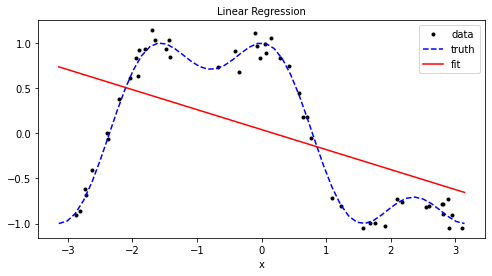

In [7]:
perf_df2, fig2 = fit_linear_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig2.savefig("toy_samples_figures/figure3.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf_df2], ignore_index=True)
print(combined_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.001097                 0.033124   
1                       rat quad            0.001373                 0.037055   
2                        orn uhl            0.006848                 0.082752   
3                         Smooth            0.009331                 0.096595   
4              Smooth + Periodic            0.004199                 0.064801   
5  Smooth + Periodic + Symmetric            0.003581                 0.059843   
6              Linear Regression            0.514218                 0.717090   
7                  Random Forest            0.005778                 0.076011   

   Mean Absolute Error  R2 Score  
0             0.027952  0.998264  
1             0.031689  0.997828  
2             0.053565  0.989166  
3             0.064251  0.985239  
4             0.053432  0.993357  
5             0.050325  0.994334  
6             0.608045  0

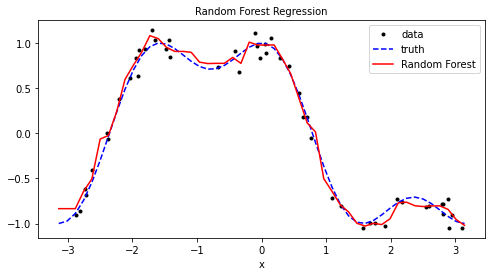

In [8]:
perf_rf, fig3 = fit_rf_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig3.savefig("toy_samples_figures/figure4.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf_rf], ignore_index=True)
print(combined_df)
plt.show()

                                             Model  Mean Squared Error  \
0                                       exp square            0.001097   
1                                         rat quad            0.001373   
2                                          orn uhl            0.006848   
3                                           Smooth            0.009331   
4                                Smooth + Periodic            0.004199   
5                    Smooth + Periodic + Symmetric            0.003581   
6                                Linear Regression            0.514218   
7                                    Random Forest            0.005778   
8  Frequentist Penalized Regression with B-splines            0.011887   

   Root Mean Squared Error  Mean Absolute Error  R2 Score  
0                 0.033124             0.027952  0.998264  
1                 0.037055             0.031689  0.997828  
2                 0.082752             0.053565  0.989166  
3                 0

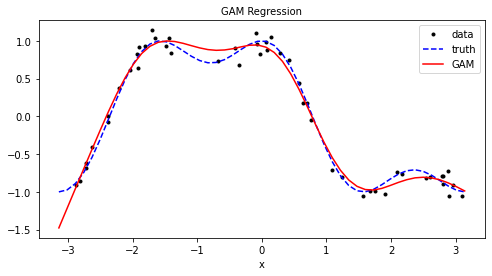

In [9]:
perf4, fig4 = fit_gam_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig4.savefig("toy_samples_figures/figure5.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf4], ignore_index=True)
print(combined_df)
plt.show()

In [10]:
result = pd.DataFrame(combined_df)
result = result.round(5)
result.head(10)

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R2 Score
0,exp square,0.00110,0.03312,0.02795,0.99826
1,rat quad,0.00137,0.03706,0.03169,0.99783
2,orn uhl,0.00685,0.08275,0.05356,0.98917
3,Smooth,0.00933,0.09660,0.06425,0.98524
4,Smooth + Periodic,0.00420,0.06480,0.05343,0.99336
5,Smooth + Periodic + Symmetric,0.00358,0.05984,0.05033,0.99433
6,Linear Regression,0.51422,0.71709,0.60805,0.18649
7,Random Forest,0.00578,0.07601,0.05915,0.99086
8,Frequentist Penalized Regression with B-splines,0.01189,0.10903,0.07852,0.98120
